In [3]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [4]:
# Read the data from 'poly.csv' to a dataframe
df = pd.read_csv('poly.csv')
# Get the column values for x & y in numpy arrays
x = df[['x']].values
y = df['y'].values

In [5]:
# Take a quick look at the dataframe
df.head()

,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819


Text(0.5, 1.0, '$y$ vs $x$')

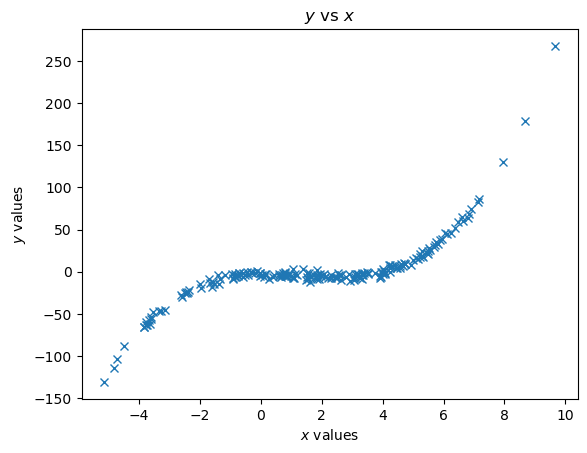

In [6]:
# Plot x & y to visually inspect the data

fig, ax = plt.subplots()
ax.plot(x,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$y$ vs $x$');

In [7]:
# Fit a linear model on the data
model = LinearRegression()
model.fit(x, y)

# Get the predictions on the entire data using the .predict() function
y_lin_pred = model.predict(x)

In [11]:
### edTest(test_deg) ###
# Now, we try polynomial regression
# GUESS the correct polynomial degree based on the above graph

guess_degree = 3

# Generate polynomial features on the entire data
x_poly= PolynomialFeatures(degree=guess_degree).fit_transform(x)
print(x_poly)
print(x)

[[ 1.00000000e+00 -3.29215704e+00  1.08382980e+01 -3.56813789e+01]
 [ 1.00000000e+00  7.99528375e-01  6.39245622e-01  5.11095014e-01]
 [ 1.00000000e+00 -9.36213952e-01  8.76496565e-01 -8.20588313e-01]
 [ 1.00000000e+00 -4.72267960e+00  2.23037026e+01 -1.05333241e+02]
 [ 1.00000000e+00 -3.60267397e+00  1.29792597e+01 -4.67600412e+01]
 [ 1.00000000e+00  4.93183364e+00  2.43229830e+01  1.19956906e+02]
 [ 1.00000000e+00 -8.50265253e-01  7.22951000e-01 -6.14700114e-01]
 [ 1.00000000e+00  2.45407162e+00  6.02246754e+00  1.47795667e+01]
 [ 1.00000000e+00  2.30965656e+00  5.33451340e+00  1.23208939e+01]
 [ 1.00000000e+00  7.68204494e-01  5.90138145e-01  4.53346775e-01]
 [ 1.00000000e+00  1.56786929e+00  2.45821410e+00  3.85415839e+00]
 [ 1.00000000e+00 -2.36282052e+00  5.58292081e+00 -1.31914399e+01]
 [ 1.00000000e+00 -2.83113175e-01  8.01530701e-02 -2.26923902e-02]
 [ 1.00000000e+00  1.63497495e+00  2.67314309e+00  4.37052199e+00]
 [ 1.00000000e+00  6.68410302e-01  4.46772332e-01  2.98627229e

In [12]:
#Fit a polynomial model on the data, using x_poly as features
# Note: since PolynomialFeatures adds an intercept by default
# we will set fit_intercept to False to avoid having 2 intercepts
polymodel = LinearRegression(fit_intercept=False)
polymodel.fit(x_poly,y)

y_poly_pred = polymodel.predict(x_poly)

In [13]:
# To visualise the results, we create a linspace of evenly spaced values
# This ensures that there are no gaps in our prediction line as well as
# avoiding the need to create a sorted set of our data.
# Worth examining and understand the code 

# create an array of evenly spaced values
x_l = np.linspace(np.min(x),np.max(x),100).reshape(-1, 1)

# Prediction on the linspace values
y_lin_pred_l = model.predict(x_l)

# PolynomialFeatures on the linspace values
x_poly_l= PolynomialFeatures(degree=guess_degree).fit_transform(x_l)

# Prediction on the polynomial linspace values
y_poly_pred_l = polymodel.predict(x_poly_l)

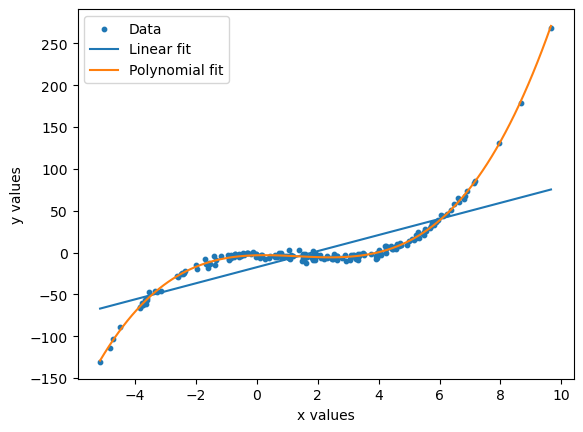

In [14]:
# First plot x & y values using plt.scatter
plt.scatter(x, y, s=10, label="Data")

# Now, plot the linear regression fit curve (using linspace)
plt.plot(x_l,y_lin_pred_l,label="Linear fit")

# Also plot the polynomial regression fit curve (using linspace)
plt.plot(x_l, y_poly_pred_l, label="Polynomial fit")

#Assigning labels to the axes
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()

In [15]:
### edTest(test_poly_predictions) ###
#Calculate the residual values for the polynomial model
poly_residuals = y - y_poly_pred


In [16]:
### edTest(test_linear_predictions) ###
#Calculate the residual values for the linear model
lin_residuals = y - y_lin_pred

Text(0.5, 0.98, 'Residual Analysis (Linear vs Polynomial)')

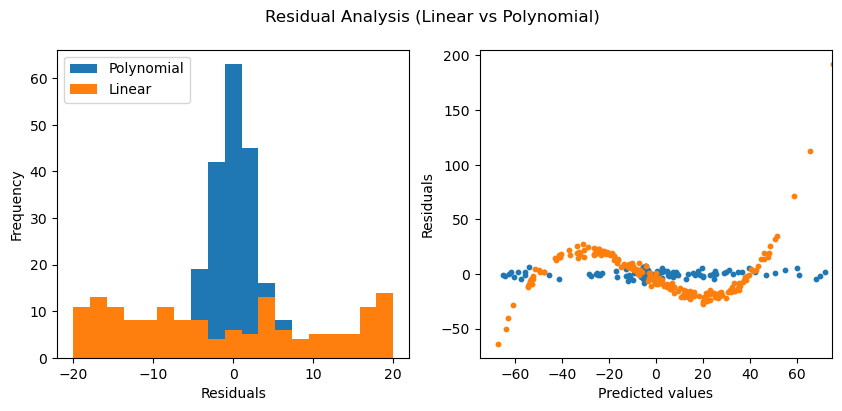

In [17]:
#Use the below helper code to plot residual values
#Plot the histograms of the residuals for the two cases

#Distribution of residuals
fig, ax = plt.subplots(1,2, figsize = (10,4))
bins = np.linspace(-20,20,20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

#Plot the histograms for the polynomial regression
ax[0].hist(poly_residuals, bins,label = 'Polynomial')

#Plot the histograms for the linear regression
ax[0].hist(lin_residuals, bins, label = 'Linear')

ax[0].legend(loc = 'upper left')

# Distribution of predicted values with the residuals
ax[1].scatter(y_poly_pred, poly_residuals, s=10)
ax[1].scatter(y_lin_pred, lin_residuals, s = 10 )
ax[1].set_xlim(-75,75)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')

fig.suptitle('Residual Analysis (Linear vs Polynomial)');

## Question: 
Do you think that polynomial degree is appropriate. Experiment with a degree of polynomial =2 and comment on what you observe for the residuals.